In [194]:
!pip install pandas-datareader
!pip install yfinance

In [195]:
from pandas_datareader import data
import yfinance as yf
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

yf.pdr_override()

In [196]:
apl_yahoo = data.DataReader('AAPL', '2023-1-1')
apl_yahoo.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2023-01-03 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       226 non-null    float64
 1   High       226 non-null    float64
 2   Low        226 non-null    float64
 3   Close      226 non-null    float64
 4   Adj Close  226 non-null    float64
 5   Volume     226 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.4 KB


In [197]:
print(apl_yahoo)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.374794   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.657639   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.325073   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.899506   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.426559   
...                ...         ...         ...         ...         ...   
2023-11-17  190.250000  190.380005  188.570007  189.690002  189.690002   
2023-11-20  189.889999  191.910004  189.880005  191.449997  191.449997   
2023-11-21  191.410004  191.520004  189.740005  190.639999  190.639999   
2023-11-22  191.490005  192.929993  190.830002  191.309998  191.309998   
2023-11-24  190.869995  190.899994  189.250000  189.970001  189.970001   

               Volume  
Date         

In [198]:
S0 = 125.070000 # initial value
r = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # in years
I = 10000 # number of random draws
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * npr.standard_normal(I))


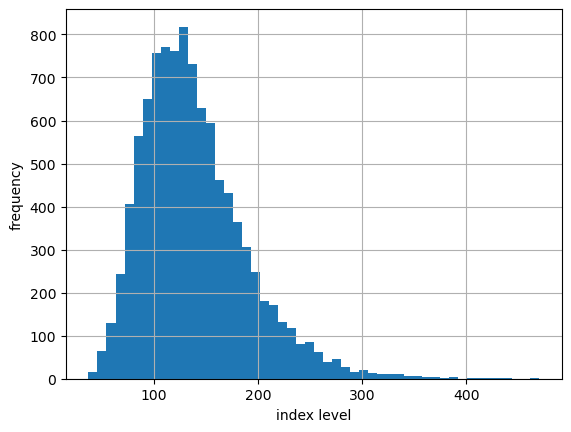

In [199]:
# Histogram of Apple stock prices at maturity after a two-year simulation, starting with an initial value derived from the closing price at the beginning of the year
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

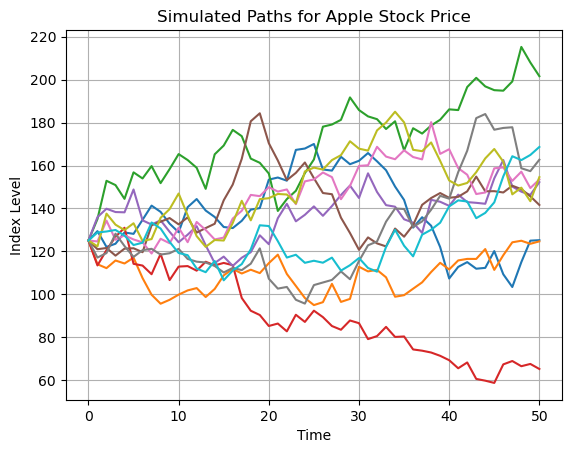

In [200]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('Time')
plt.ylabel('Index Level')
plt.title('Simulated Paths for Apple Stock Price')
plt.grid(True)
plt.show()

In [201]:
amz_yahoo = data.DataReader('AMZN', '2023-1-1')
amz_yahoo.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2023-01-03 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       226 non-null    float64
 1   High       226 non-null    float64
 2   Low        226 non-null    float64
 3   Close      226 non-null    float64
 4   Adj Close  226 non-null    float64
 5   Volume     226 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.4 KB


In [202]:
print(amz_yahoo)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03   85.459999   86.959999   84.209999   85.820000   85.820000   
2023-01-04   86.550003   86.980003   83.360001   85.139999   85.139999   
2023-01-05   85.330002   85.419998   83.070000   83.120003   83.120003   
2023-01-06   83.029999   86.400002   81.430000   86.080002   86.080002   
2023-01-09   87.459999   89.480003   87.080002   87.360001   87.360001   
...                ...         ...         ...         ...         ...   
2023-11-17  142.660004  145.229996  142.539993  145.179993  145.179993   
2023-11-20  145.130005  146.630005  144.729996  146.130005  146.130005   
2023-11-21  143.910004  144.050003  141.500000  143.899994  143.899994   
2023-11-22  144.570007  147.740005  144.570007  146.710007  146.710007   
2023-11-24  146.699997  147.199997  145.320007  146.740005  146.740005   

              Volume  
Date          

In [203]:
S0 = 85.820000 # initial value
r = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # in years
I = 10000 # number of random draws
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * npr.standard_normal(I))

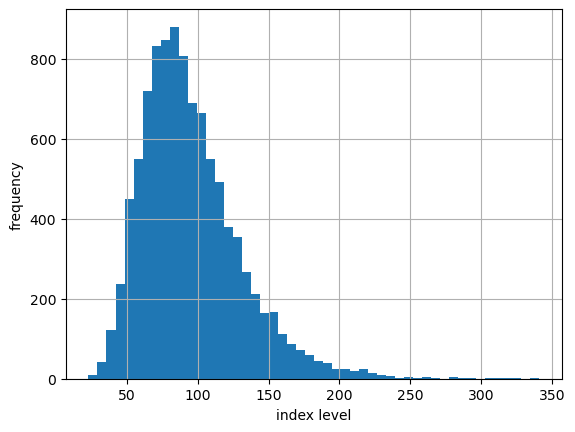

In [204]:
# Histogram of Amazons stock prices at maturity after a two-year simulation, starting with an initial value derived from the closing price at the beginning of the year
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

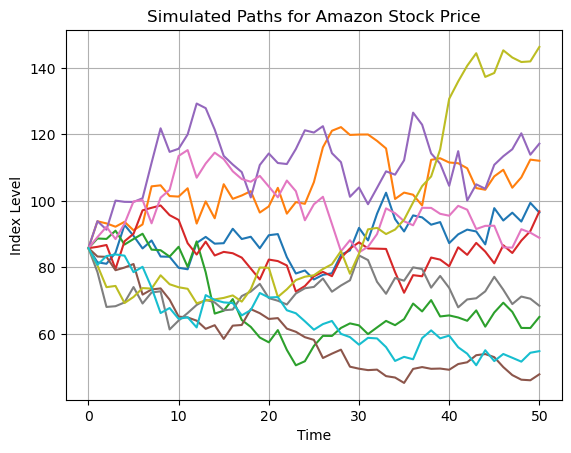

In [205]:
# Plot the first 10 paths
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('Time')
plt.ylabel('Index Level')
plt.title('Simulated Paths for Amazon Stock Price')
plt.grid(True)
plt.show()

In [206]:
gog_yahoo = data.DataReader('GOOG', '2023-1-1')
gog_yahoo.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2023-01-03 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       226 non-null    float64
 1   High       226 non-null    float64
 2   Low        226 non-null    float64
 3   Close      226 non-null    float64
 4   Adj Close  226 non-null    float64
 5   Volume     226 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.4 KB


In [207]:
print(gog_yahoo)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03   89.830002   91.550003   89.019997   89.699997   89.699997   
2023-01-04   91.010002   91.239998   87.800003   88.709999   88.709999   
2023-01-05   88.070000   88.209999   86.559998   86.769997   86.769997   
2023-01-06   87.360001   88.470001   85.570000   88.160004   88.160004   
2023-01-09   89.195000   90.830002   88.580002   88.800003   88.800003   
...                ...         ...         ...         ...         ...   
2023-11-17  137.820007  138.000000  135.479996  136.940002  136.940002   
2023-11-20  135.500000  138.425003  135.490005  137.919998  137.919998   
2023-11-21  137.940002  138.964996  137.705002  138.619995  138.619995   
2023-11-22  139.100006  141.100006  139.000000  140.020004  140.020004   
2023-11-24  139.539993  139.677002  137.470001  138.220001  138.220001   

              Volume  
Date          

In [208]:
S0 =  89.699997 # initial value
r = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # in years
I = 10000 # number of random draws
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * npr.standard_normal(I))

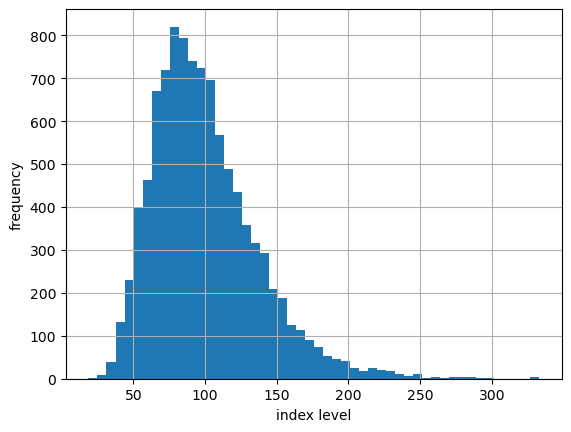

In [209]:
# Histogram of Googles stock prices at maturity after a two-year simulation, starting with an initial value derived from the closing price at the beginning of the year
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

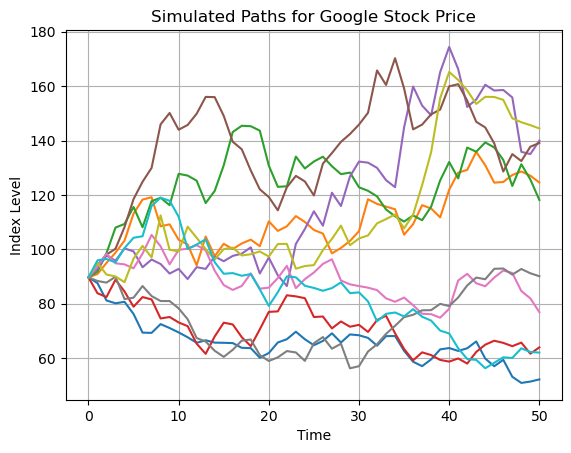

In [210]:
# Plot the first 10 paths
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('Time')
plt.ylabel('Index Level')
plt.title('Simulated Paths for Google Stock Price')
plt.grid(True)
plt.show()

In [211]:
msft_yahoo = data.DataReader('MSFT', '2023-1-1')
msft_yahoo.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2023-01-03 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       226 non-null    float64
 1   High       226 non-null    float64
 2   Low        226 non-null    float64
 3   Close      226 non-null    float64
 4   Adj Close  226 non-null    float64
 5   Volume     226 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.4 KB


In [212]:
print(msft_yahoo)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  237.474335   
2023-01-04  232.279999  232.869995  225.960007  229.100006  227.086456   
2023-01-05  227.199997  227.550003  221.759995  222.309998  220.356125   
2023-01-06  223.000000  225.759995  219.350006  224.929993  222.953079   
2023-01-09  226.449997  231.240005  226.410004  227.119995  225.123840   
...                ...         ...         ...         ...         ...   
2023-11-17  373.609985  374.369995  367.000000  369.850006  369.850006   
2023-11-20  371.220001  378.869995  371.000000  377.440002  377.440002   
2023-11-21  375.670013  376.220001  371.119995  373.070007  373.070007   
2023-11-22  378.000000  379.790009  374.970001  377.850006  377.850006   
2023-11-24  377.329987  377.970001  375.140015  377.429993  377.429993   

              Volume  
Date          

In [213]:
S0 =  239.580002 # initial value
r = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # in years
I = 10000 # number of random draws
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * npr.standard_normal(I))

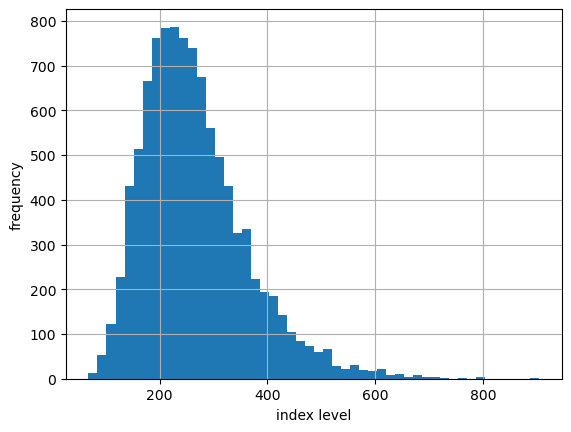

In [214]:
# Histogram of Microsofts stock prices at maturity after a two-year simulation, starting with an initial value derived from the closing price at the beginning of the year
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

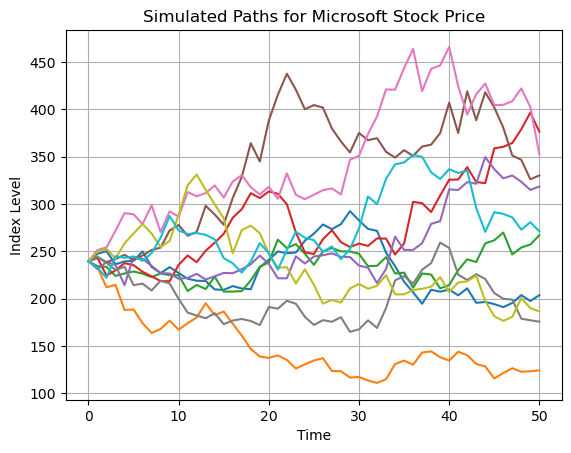

In [215]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('Time')
plt.ylabel('Index Level')
plt.title('Simulated Paths for Microsoft Stock Price')
plt.grid(True)
plt.show()

In [216]:
meta_yahoo = data.DataReader('META', '2023-1-1')
meta_yahoo.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2023-01-03 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       226 non-null    float64
 1   High       226 non-null    float64
 2   Low        226 non-null    float64
 3   Close      226 non-null    float64
 4   Adj Close  226 non-null    float64
 5   Volume     226 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.4 KB


In [217]:
print(meta_yahoo)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  122.820000  126.370003  122.279999  124.739998  124.739998   
2023-01-04  127.379997  129.050003  125.849998  127.370003  127.370003   
2023-01-05  126.129997  128.520004  124.540001  126.940002  126.940002   
2023-01-06  128.970001  130.330002  126.040001  130.020004  130.020004   
2023-01-09  131.160004  132.949997  129.279999  129.470001  129.470001   
...                ...         ...         ...         ...         ...   
2023-11-17  330.260010  335.500000  329.350006  335.040009  335.040009   
2023-11-20  334.890015  341.869995  334.190002  339.970001  339.970001   
2023-11-21  338.329987  339.899994  335.899994  336.980011  336.980011   
2023-11-22  339.209991  342.920013  338.579987  341.489990  341.489990   
2023-11-24  340.130005  341.859985  336.769989  338.230011  338.230011   

              Volume  
Date          

In [218]:
S0 =  124.739998  # initial value
r = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # in years
I = 10000 # number of random draws
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * npr.standard_normal(I))

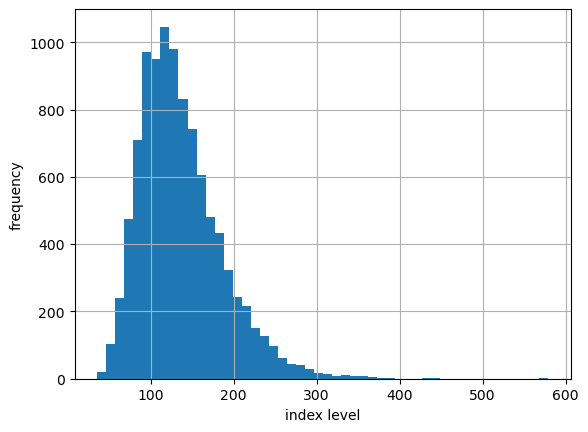

In [219]:
# Histogram of Meta stock prices at maturity after a two-year simulation, starting with an initial value derived from the closing price at the beginning of the year
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

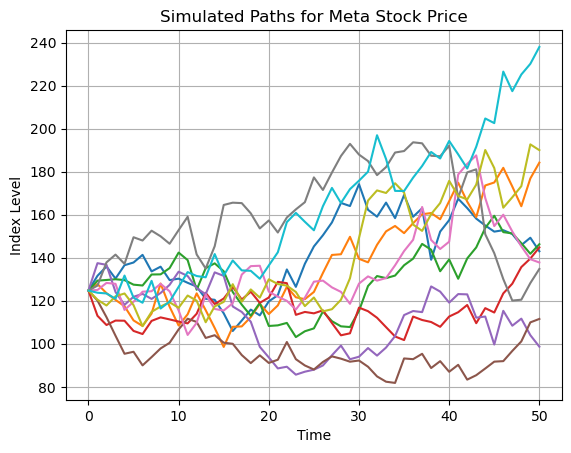

In [220]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('Time')
plt.ylabel('Index Level')
plt.title('Simulated Paths for Meta Stock Price')
plt.grid(True)
plt.show()